In [1]:
from shapely.geometry import Polygon, Point, LineString
from shapely import affinity
import matplotlib.pyplot as plt
import random

In [22]:
# Create polygons and points
polygon = Polygon([(10, 0), (10, 100), (0, 200), (60, 200), (50, 100), (50, 0)])
# TODO: Randomize start and end point on the bound
start = Point((20, 0))
end = Point((30, 200))
side = LineString([(0, 200), (60, 200)])

In [3]:
# Find m and b
def fx(p1, p2):
    # m = (y1 - y2) / (x1 - x2)
    if (p1.x - p2.x) != 0:
        m = (p1.y - p2.y) / (p1.x - p2.x)
    else:
        m = 0
    print("m =", m)
    # b = y - mx
    b = p1.y - (m * p1.x)
    print("b =", b)

    return m, b


In [4]:
# Find distance from point to line
# Equations to find point to line:
# +=d = (mx3 - y3 + C) / ((m^2 + 1)) ^ 0.5
def distance(point, m, b):
    x = point.x
    y = point.y
    d = (m * x - y + b) / ((m ** 2 + 1)) ** 0.5
    return d

In [5]:
# D = sqrt((start.x - point.x)^2 + (start.y - point.y)^2)
def pointsOnLine(start, end, n):
    pointsOL = []
    line = LineString([start, end])
    gap = 1 / (n + 1)
    d = gap
    for i in range(n):
        point = line.interpolate(d, normalized=True)
        d = d + gap
        pointsOL.append(point)
    pointsOL.append(end)
    return pointsOL
    

In [6]:
# Rotate points +-90 degrees
def pointRotate(origin, end, degree=90, d=0.1):
    line = LineString([origin, end])
    point = line.interpolate(d, normalized=True)
    rotated_point = affinity.rotate(point, degree, origin=origin)
    return rotated_point

In [7]:
#def shiftedPoints(polygon, start, end, n):
#    points = pointsOnLine(start, end, n)
#    print(len(points))
#    # rotate points[]
#    new_points = []
#    for i in range(len(points)):
#        if i == len(points) - 1:
#            new_point = pointRotate(points[i], points[i-1], degree=-90, d=0.05*i**1.3)
#            print(0.1*i**1.2)
#            new_points.append(new_point)
#        else:
#            new_point = pointRotate(points[i], points[i+1], d=0.05*i**1.3)
#            print(0.1*i**1.2)
#            new_points.append(new_point)
#    return new_points
    

In [7]:
def shiftedPoints(start, line, polygon, n):
    d = random.random()
    end = line.interpolate(d, normalized=True)
    points = pointsOnLine(start, end, n)
    print(len(points))
    # rotate points[]
    new_points = []
    for i in range(len(points)):
        chance = random.random()
        if chance >= 0.5:
            if i == len(points) - 1:
                new_point = pointRotate(points[i], points[i-1], degree=90, d=0.05*i**(1+chance))
                print(0.1*i**(1+chance))
                if polygon.contains(new_point):
                    new_points.append(new_point)
            else:
                new_point = pointRotate(points[i], points[i+1], degree=90, d=0.05*i**(1+chance))
                print(0.1*i**(1+chance))
                if polygon.contains(new_point):
                    new_points.append(new_point)
        else:
            if i == len(points) - 1:
                new_point = pointRotate(points[i], points[i-1], degree=-90, d=0.05*i**(1+chance))
                print(0.1*i**1.2)
                if polygon.contains(new_point):
                    new_points.append(new_point)
            else:
                new_point = pointRotate(points[i], points[i+1], degree=-90, d=0.05*i**(1+chance))
                print(0.1*i**1.2)
                if polygon.contains(new_point):
                    new_points.append(new_point)
    return new_points, end

In [23]:
def shiftedPointsB(start, end, polygon, n):
    points = pointsOnLine(start, end, n)
    print(len(points))
    # rotate points[]
    new_points = []
    for i in range(len(points)):
        chance = random.random()
        if chance >= 0.5:
            if i == len(points) - 1:
                new_point = pointRotate(points[i], points[i-1], degree=90, d=0.05*i**(1+chance))
                print(0.1*i**(1+chance))
                if polygon.contains(new_point):
                    new_points.append(new_point)
            else:
                new_point = pointRotate(points[i], points[i+1], degree=90, d=0.05*i**(1+chance))
                print(0.1*i**(1+chance))
                if polygon.contains(new_point):
                    new_points.append(new_point)
        else:
            if i == len(points) - 1:
                new_point = pointRotate(points[i], points[i-1], degree=-90, d=0.05*i**(1+chance))
                print(0.1*i**1.2)
                if polygon.contains(new_point):
                    new_points.append(new_point)
            else:
                new_point = pointRotate(points[i], points[i+1], degree=-90, d=0.05*i**(1+chance))
                print(0.1*i**1.2)
                if polygon.contains(new_point):
                    new_points.append(new_point)
    return new_points, end

In [24]:
def randSide(polygon):
    x,y = polygon.exterior.xy
    n = len(x) - 1
    index = random.randint(-1, n-1)
    pointA = Point((x[index], y[index]))
    pointB = Point((x[index+1], y[index+1]))
    return LineString([pointA, pointB])

In [25]:
def closestEnd(points, side):
    p = points[-1]
    d = side.project(p)
    end = side.interpolate(d)
    return end

11
0.0
0.1
0.3739094394299629
0.577567920904863
1.0073929598687144
1.987877750614982
0.8585814486631533
1.0330412131161866
1.2125732532083184
1.3966610165238236
1.5848931924611134
11
0.0
0.1
0.22973967099940698
0.3737192818846552
0.5278031643091577
0.6898648307306074
2.6211240259380832
1.0330412131161866
1.2125732532083184
5.286346021170122
3.8146593191335665
11
0.0
0.1
0.22973967099940698
0.3737192818846552
0.5278031643091577
0.6898648307306074
2.7334204750475997
1.0330412131161866
1.2125732532083184
1.3966610165238236
1.5848931924611134
11
0.0
0.1
0.3296367583392199
0.3737192818846552
0.9047468201784181
2.0072879123566145
2.4140946271790686
1.0330412131161866
1.2125732532083184
1.3966610165238236
1.5848931924611134
11
0.0
0.1
0.32487728376845904
0.8942104307650056
0.8022177950928496
2.087049527144504
0.8585814486631533
3.7787067323861017
2.797203105787811
4.2999757469975215
4.740260518941301
11
0.0
0.1
0.3778208108997989
0.8109018963300173
0.5278031643091577
0.6898648307306074
2.7873

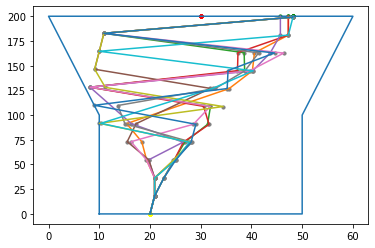

In [40]:
# Plot polygons and points
x,y = polygon.exterior.xy
plt.plot(x,y)

for i in range(10):
    line_x = [start.x]
    line_y = [start.y]

    # Make sure the side isn't the same as the start point
    #condition = True
    #while condition == True:
    #    side = randSide(polygon)
    #    minx, miny, maxx, maxy = side.bounds
    #    print(minx, miny, maxx, maxy)
    #    if miny != maxy or miny != start.y or maxy != start.y:
    #        condition = False



    new_points, end = shiftedPointsB(start, end, polygon, 10)
    plt.scatter(end.x, end.y, s=10, color='red')

    newEnd = closestEnd(new_points, side)
    plt.scatter(newEnd.x, newEnd.y, s=10, color='green')

    for i in range(len(new_points)):
        line_x.append(new_points[i].x)
        line_y.append(new_points[i].y)
        plt.scatter(new_points[i].x, new_points[i].y, s=10, color='grey')

    plt.scatter(start.x, start.y, s=10, color='yellow')        
    line_x.append(newEnd.x)
    line_y.append(newEnd.y)
    plt.plot(line_x, line_y)